# Introduction
- This is a movie data analytics. It contains information of 5,000 movies.

- Got the Movie dataset from [kaggle](https://www.kaggle.com/sshake/movie-dataset) site 

## Questions
1. The feature associated with the top 10 movies?
2. Does higher populality means higher profits?
3. Does higher budget mean higher popularity ? Is there a coefficent relationship ?
4. Which genres are most popular from year to year?
5. Will the runtime affect the vote count and popularity?

### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline

### Data munging
- Exploring the data to find out the insight within our data. This includes identifying, the data type, data structure, missing values, duplicates and unuseful columns.

#### Loading our data

In [2]:
movie_raw_data = os.path.join(os.path.pardir,'data','raw',"movie-data.csv")
movie_raw_data
movie_data_frame = pd.read_csv(movie_raw_data)
movie_data_frame

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,26264,tt0322389,0.979077,0,0,George of the Jungle 2,Christopher Showerman|Julie Benz|Thomas Haden ...,NaN,David Grossman,Watch Out For That Sequel!,...,"George and Ursula now have a son, George Junio...",87.0,Adventure|Comedy|Family,Walt Disney Pictures,8/18/03,55.0,4.3,2003.0,0.000000e+00,0.000000e+00
5010,9373,tt0324216,0.920571,9500000,107071655,The Texas Chainsaw Massacre,Jessica Biel|Jonathan Tucker|Erica Leerhsen|Mi...,NaN,Marcus Nispel,What you know about fear... doesn't even come ...,...,After picking up a traumatized young hitchhike...,98.0,Horror,New Line Cinema|Next Entertainment|Platinum Du...,10/17/03,333.0,6.0,2003.0,1.126085e+07,1.269177e+08
5011,1647,tt0292506,0.894267,0,101191884,The Recruit,Al Pacino|Colin Farrell|Bridget Moynahan|Gabri...,NaN,Roger Donaldson,Trust. Betrayal. Deception. In the C.I.A. noth...,...,A brilliant young CIA trainee is asked by his ...,115.0,Action|Thriller|Crime|Drama,Spyglass Entertainment|Touchstone Pictures,1/25/03,290.0,5.9,2003.0,0.000000e+00,1.199481e+08
5012,11007,tt0349205,0.876158,40000000,190212113,Cheaper by the Dozen,Steve Martin|Bonnie Hunt|Piper Perabo|Tom Well...,NaN,Shawn Levy,Growing pains? They've got twelve of them!,...,The Baker brood moves to Chicago after patriar...,98.0,Comedy|Drama|Family,Twentieth Century Fox Film Corporation|Robert ...,12/24/03,357.0,5.8,2003.0,4.741411e+07,2.254684e+08


In [3]:
# checking the rows and columns of our dataset respectively
movie_data_frame.shape

(5014, 21)

In [4]:
 # check datatypes to see if there are some wrongly categorized types
movie_data_frame.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count              float64
vote_average            float64
release_year            float64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# check the sum of all columns with none null values
movie_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 21 columns):
id                      5014 non-null int64
imdb_id                 5007 non-null object
popularity              5014 non-null float64
budget                  5014 non-null int64
revenue                 5014 non-null int64
original_title          5014 non-null object
cast                    4964 non-null object
homepage                2008 non-null object
director                4982 non-null object
tagline                 3534 non-null object
keywords                4110 non-null object
overview                5009 non-null object
runtime                 5013 non-null float64
genres                  5000 non-null object
production_companies    4478 non-null object
release_date            5013 non-null object
vote_count              5013 non-null float64
vote_average            5013 non-null float64
release_year            5013 non-null float64
budget_adj              5013 non-nul

In [6]:
# numerical values for this data 
movie_data_frame.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5014.000000,5014.000000,5.014000e+03,5.014000e+03,5013.000000,5013.000000,5013.000000,5013.000000,5.013000e+03,5.013000e+03
mean,103926.261468,0.738429,1.637831e+07,4.459922e+07,100.088171,266.840016,5.920407,2008.821664,1.732822e+07,4.766369e+07
std,110376.007140,1.291184,3.496689e+07,1.366465e+08,34.872922,700.139940,0.984000,6.339311,3.616983e+07,1.468173e+08
min,11.000000,0.001317,0.000000e+00,0.000000e+00,0.000000,10.000000,2.000000,1977.000000,0.000000e+00,0.000000e+00
25%,16881.750000,0.206441,0.000000e+00,0.000000e+00,90.000000,18.000000,5.300000,2008.000000,0.000000e+00,0.000000e+00
50%,52137.500000,0.394369,0.000000e+00,0.000000e+00,97.000000,42.000000,6.000000,2010.000000,0.000000e+00,0.000000e+00
75%,171411.000000,0.786107,1.600000e+07,1.870594e+07,109.000000,182.000000,6.600000,2014.000000,1.823016e+07,2.105926e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# count all non rows with null values in certain columns
movie_data_frame.isnull().sum()

id                         0
imdb_id                    7
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      50
homepage                3006
director                  32
tagline                 1480
keywords                 904
overview                   5
runtime                    1
genres                    14
production_companies     536
release_date               1
vote_count                 1
vote_average               1
release_year               1
budget_adj                 1
revenue_adj                1
dtype: int64

In [8]:
# check each columns number of unique values
movie_data_frame.nunique()

id                      5013
imdb_id                 5006
popularity              5001
budget                   343
revenue                 2062
original_title          4972
cast                    4942
homepage                1988
director                3263
tagline                 3516
keywords                3835
overview                5004
runtime                  214
genres                  1248
production_companies    3808
release_date            2379
vote_count               953
vote_average              69
release_year              13
budget_adj              1040
revenue_adj             2077
dtype: int64

In [9]:
# Drop unnecessary columns
# inplace=True ensures the output is not displayed
movie_data_frame.drop(['id','imdb_id','overview','homepage'],axis=1, inplace=True)

In [10]:
# handle missing data
movie_data_frame['cast'].fillna('missing',inplace=True)
movie_data_frame['director'].fillna('missing',inplace=True)
movie_data_frame['tagline'].fillna('missing',inplace=True)
movie_data_frame['keywords'].fillna('missing',inplace=True)
movie_data_frame['genres'].fillna('missing',inplace=True)
movie_data_frame['production_companies'].fillna('missing',inplace=True)
movie_data_frame['budget'] = movie_data_frame['budget'].replace(0, np.NAN) 

In [11]:
# confirm that no field contain null variable
movie_data_frame.isnull().sum()

popularity                 0
budget                  2698
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    1
genres                     0
production_companies       0
release_date               1
vote_count                 1
vote_average               1
release_year               1
budget_adj                 1
revenue_adj                1
dtype: int64

In [12]:
# check if there are possible duplicates
movie_data_frame.duplicated().sum()

1

In [13]:
# drop duplicate
movie_data_frame.drop_duplicates(inplace=True)
# confirm again 
movie_data_frame.duplicated().sum()

0

## Visualization

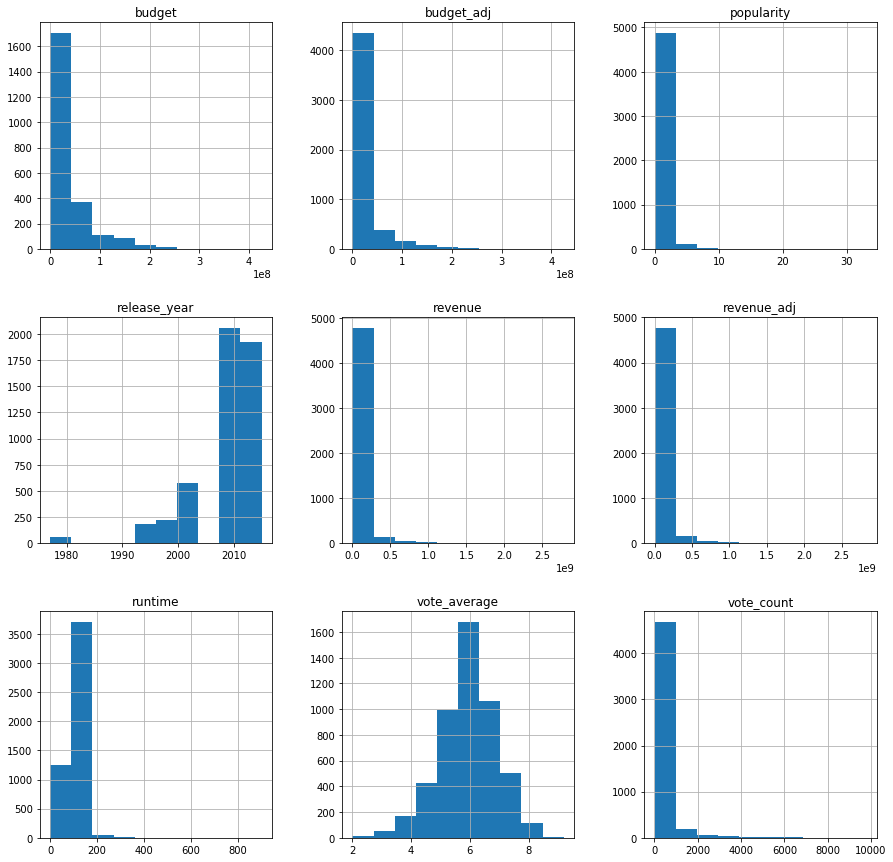

In [14]:
# visulaize using hitogram
movie_data_frame.hist(figsize=(15,15));

### `Question 1`. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

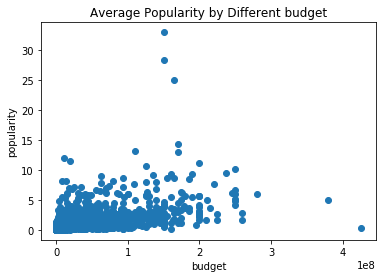

In [15]:
x = movie_data_frame['budget']
y = movie_data_frame['popularity']
plt.scatter(x,y)
plt.title('Average Popularity by Different budget',fontsize=12)
plt.xlabel('budget',fontsize=10)
plt.ylabel('popularity',fontsize=10);

#### Lets use another approach

In [16]:
# get the meadian budget
median_budget = movie_data_frame['budget'].median()
low_budget = movie_data_frame.query('budget < {}'.format(median_budget))
high_budget = movie_data_frame.query('budget > {}'.format(median_budget))

In [17]:
# chek the mean population with respect to the budget
mean_population_low_budget = low_budget['popularity'].mean()
mean_population_high_budget = high_budget['popularity'].mean()
mean_population_high_budget
mean_population_low_budget

0.6674606273291929

Text(0, 0.5, 'Average Popularity')

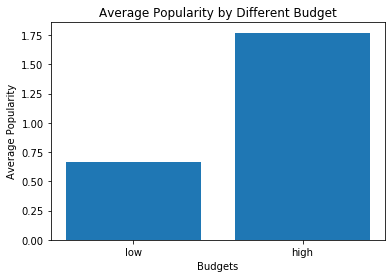

In [18]:
#create a chat bar
locations = [1,2]
heights = [mean_population_low_budget, mean_population_high_budget]
labels = ['low','high']
plt.bar(locations,heights, tick_label=labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [19]:
# conclution
dif_mean_population = mean_population_high_budget-mean_population_low_budget
increse_percentage = (dif_mean_population/mean_population_high_budget)*100
increse_percentage

62.30027987544505

#### `Conclusion`
- Hight budget movies are likely to have high popularity

### `Question 2`. What  length will receive the highest popularity?

In [20]:
# median_length = movie_data_frame['runtime'].median()
median_length = movie_data_frame.query('runtime < {}'.format(200))
low_length = movie_data_frame.query('runtime < {}'.format(100))
high_length = movie_data_frame.query('runtime > {}'.format(200))

In [21]:
# chek the mean population with respect to the length of the movie
mean_population_low_length = low_length['popularity'].mean()
mean_population_median_length = median_length['popularity'].mean()
mean_population_high_length = high_length['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

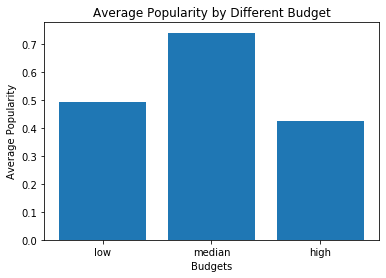

In [22]:
#create a chat bar
locations = [1,2,3]
heights = [mean_population_low_length,mean_population_median_length, mean_population_high_length]
labels = ['low','median','high']
plt.bar(locations,heights, tick_label=labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

#### `Conclution`
- Medium length movie had high populaity

#### Another approach using scatter diagram

Text(0, 0.5, 'Popularity')

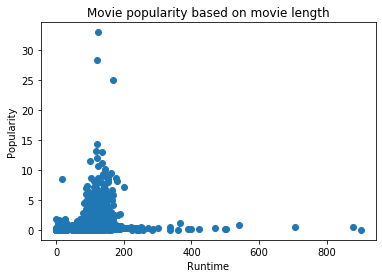

In [23]:
x = movie_data_frame['runtime']
y = movie_data_frame['popularity']
plt.scatter(x,y)
plt.title('Movie popularity based on movie length');
plt.xlabel('Runtime')
plt.ylabel('Popularity')

### `Question 3`. Does higher populality means higher profits?

In [24]:
# calculate the profit
profit = movie_data_frame['revenue'] - movie_data_frame['budget']
movie_data_frame['profit'] = profit

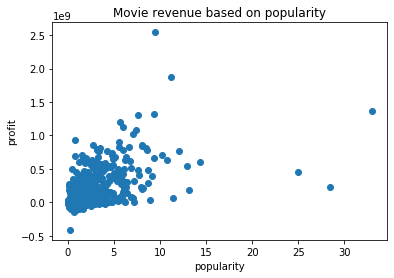

In [25]:
#visualize using scatter diagram
x = movie_data_frame['popularity']
y = movie_data_frame['profit']
plt.scatter(x,y)
plt.title('Movie revenue based on popularity')
plt.xlabel('popularity')
plt.ylabel('profit');

In [26]:
median_popularity = movie_data_frame['popularity'].median()
low_popularity = movie_data_frame.query('popularity < {}'.format(median_popularity))
high_popularity = movie_data_frame.query('popularity > {}'.format(median_popularity))

In [27]:
# Find mean profit for low and high population
mean_profit_of_low_population = low_popularity['profit'].mean()
mean_profit_of_high_population = high_popularity['profit'].mean()

Text(0, 0.5, 'Profit')

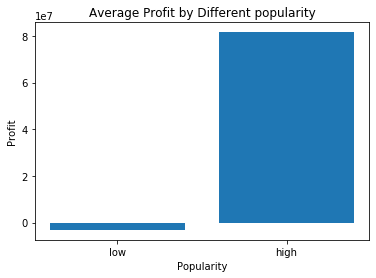

In [28]:
# visualize using chat bar
locations = [1,2]
heights = [mean_profit_of_low_population,mean_profit_of_high_population]
labels = ['low','high']
plt.bar(locations,heights, tick_label=labels)
plt.title('Average Profit by Different popularity')
plt.xlabel('Popularity')
plt.ylabel('Profit')

### Question 4 The feature associated with the top 10 revenue movies?
**Solution approach**
- *Order by revenue dec order*
- *Select the top ten movies*

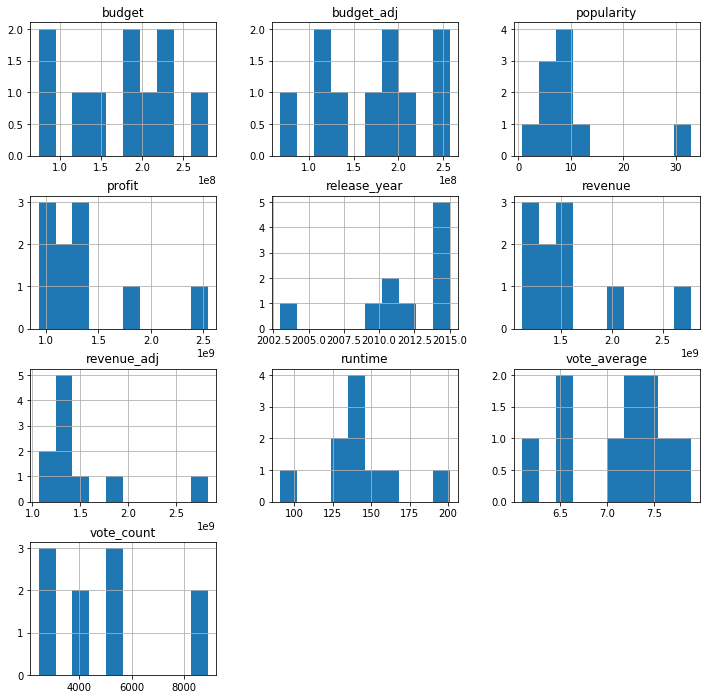

In [33]:
top_10_revenue_movies = movie_data_frame.nlargest(10,'revenue')
top_10_revenue_movies.hist(figsize=(12,12));

***The top 10 revenues movies has some common characteristing including***
- *the runtime ranges between 100-200*
- *released between 1995-2015*

### Question 5 Which genres are most popular from year to year?

In [35]:
movie_data_frame['genres']

0       Action|Adventure|Science Fiction|Thriller
1       Action|Adventure|Science Fiction|Thriller
2              Adventure|Science Fiction|Thriller
3        Action|Adventure|Science Fiction|Fantasy
4                           Action|Crime|Thriller
                          ...                    
5009                      Adventure|Comedy|Family
5010                                       Horror
5011                  Action|Thriller|Crime|Drama
5012                          Comedy|Drama|Family
5013                                      missing
Name: genres, Length: 5013, dtype: object

In [40]:
# create function to extract all genres and return the count value of each genre
def extract_data(column_name):
    extracted_data = movie_data_frame[column_name].str.cat(sep = '|')
    # split the genres by |
    extracted_data = pd.Series(extracted_data.split('|'))   
    # Count the occurrence of each genre 
    #value count and didplay in descending order
    genre_count = extracted_data.value_counts(ascending = False) 
    return genre_count

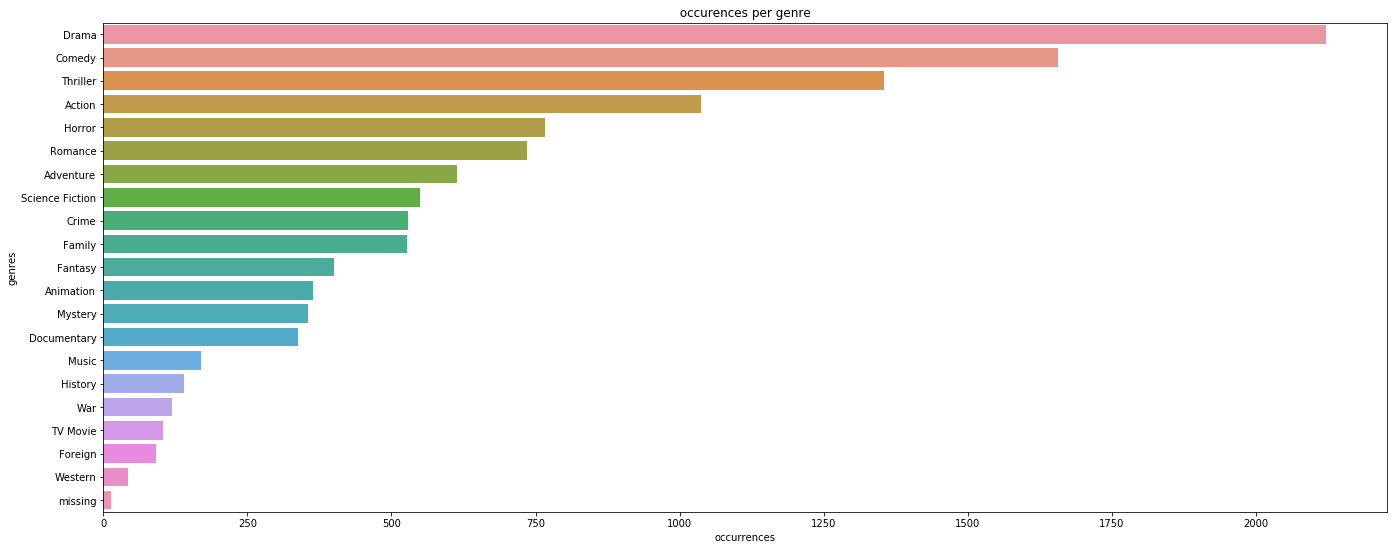

In [46]:
genre_count =  extract_data('genres')
genre_count_df = pd.DataFrame({'genres':genre_count.index, 'genre_count':genre_count.values})

f, ax = plt.subplots(figsize=(23, 9))
# use the dataframe just created as the input data 
sns.barplot(x = 'genre_count', y = 'genres', data=genre_count_df) # how to get the data is the key 
ax.set_title(' occurences per genre ')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,1.363529e+09
1,28.419936,150000000.0,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08,2.284364e+08
2,13.112507,110000000.0,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08,1.852382e+08
3,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09,1.868178e+09
4,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09,1.316249e+09
